In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv("multiclasslogreg_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [27]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [28]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: xlabel='ocean_proximity', ylabel='count'>

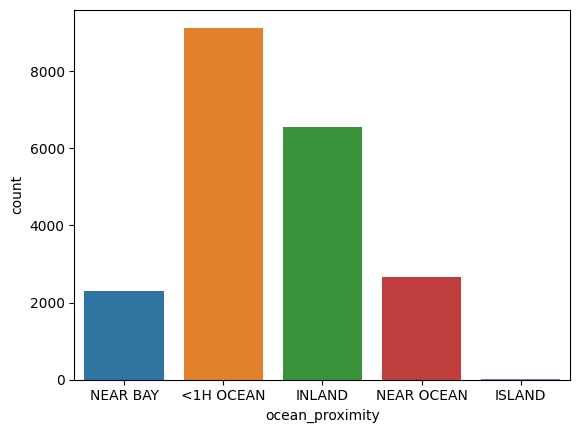

In [29]:
sns.countplot(x='ocean_proximity',data=df)

In [30]:
from sklearn.impute import SimpleImputer
column_with_missing_values = 'total_bedrooms'
imputer = SimpleImputer(strategy='most_frequent').set_output(transform="pandas")
df[column_with_missing_values] = imputer.fit_transform(df[[column_with_missing_values]])
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [31]:
X=df.drop('ocean_proximity',axis=1)
y=df['ocean_proximity']

<Axes: >

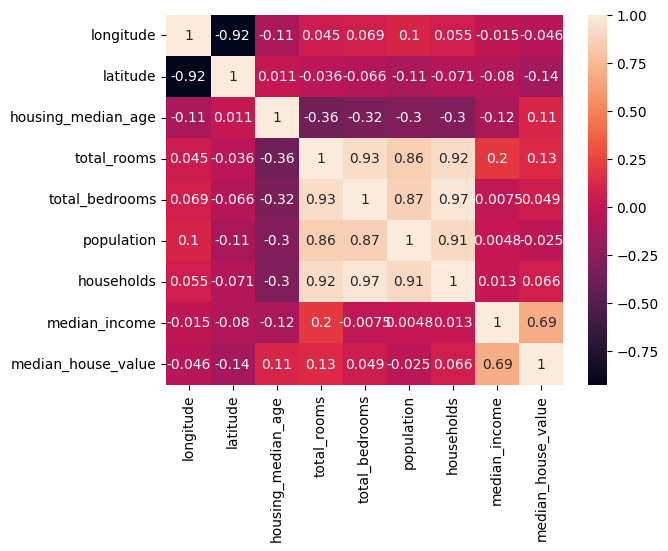

In [32]:
sns.heatmap(X.corr(),annot=True)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [36]:
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_model=LogisticRegression(solver='saga',multi_class='multinomial',max_iter=1000)

In [39]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

In [40]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [41]:
y_pred=log_model.predict(scaled_X_test)
y_pred

array(['NEAR BAY', '<1H OCEAN', '<1H OCEAN', ..., '<1H OCEAN', 'INLAND',
       '<1H OCEAN'], dtype=object)

In [42]:
accuracy_score(y_pred,y_test)

0.8096899224806201

In [43]:
confusion_matrix(y_pred,y_test)

array([[2099,  110,    0,  125,  407],
       [  27, 1510,    0,    6,   21],
       [   0,    0,    0,    0,    0],
       [  98,   10,    0,  443,   87],
       [  89,    1,    1,    0,  126]], dtype=int64)

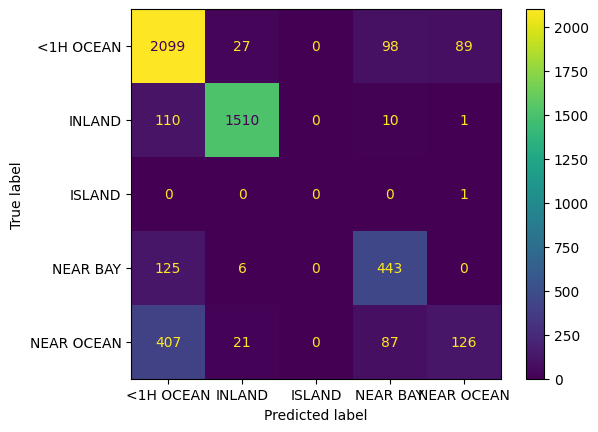

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)
disp.plot()
plt.show()

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   <1H OCEAN       0.77      0.91      0.83      2313
      INLAND       0.97      0.93      0.95      1631
      ISLAND       0.00      0.00      0.00         1
    NEAR BAY       0.69      0.77      0.73       574
  NEAR OCEAN       0.58      0.20      0.29       641

    accuracy                           0.81      5160
   macro avg       0.60      0.56      0.56      5160
weighted avg       0.80      0.81      0.79      5160



c:\Users\arind\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arind\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arind\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [46]:
from sklearn.metrics import roc_curve,auc

In [47]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

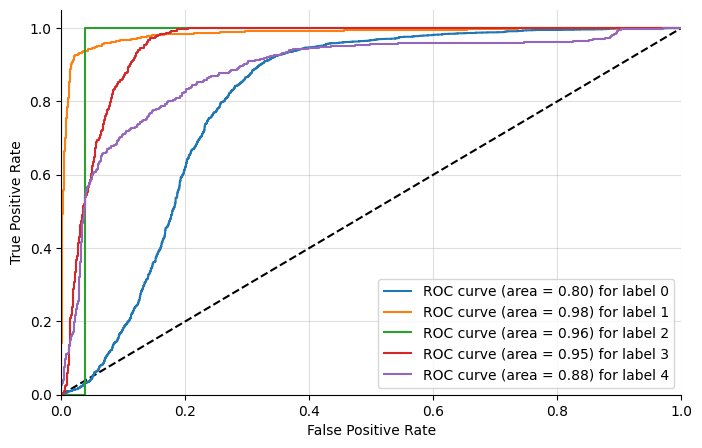

In [48]:
plot_multiclass_roc(log_model, scaled_X_test, y_test, n_classes=5, figsize=(8, 5))